In [4]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
%matplotlib inline

In [6]:
Df=pd.read_csv("FingerPrint_lt50.csv",sep='\t',index_col=0)

In [7]:
Df.head()

Formula  Ones_1  Ones_2  Ones_3    Ones_4   Ones_5    Ones_6    Ones_7  \
0   Nb1 Ag1 O3    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
1   Li2 Ag6 O4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
2  Cs2 Ag2 Cl4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
3   Ag2 Hg1 I4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
4    Ag2 C2 O6    -1.0    -1.0    -1.0 -0.999999 -0.99997 -0.999462 -0.993801   

     Ones_8    Ones_9    ...       Chi_91    Chi_92    Chi_93    Chi_94  \
0 -1.000000 -1.000000    ...    -0.497277 -0.453894 -0.191895  0.064329   
1 -1.000000 -0.999999    ...    -0.120349 -0.206105 -0.217994 -0.183563   
2 -1.000000 -1.000000    ...     0.259454  0.218056  0.031980 -0.098497   
3 -1.000000 -1.000000    ...    -0.059718 -0.141794 -0.241085 -0.272397   
4 -0.954192 -0.782973    ...    -0.123078 -0.202793 -0.201147 -0.164696   

     Chi_95    Chi_96    Chi_97    Chi_98    Chi_99   Chi_100  
0  0.104619 -0.118050 -0.394161 -0.537855 -0.587967 -0.654697  
1 -0.075639  0.073079  0.137550  0.062229 -0.112490 -0.359644  
2 -0.054451  0.137466  0.285717  0.202032 -0.097068 -0.462973  
3 -0.160438  0.054698  0.275458  0.446003  0.474980  0.227803  
4 -0.108094  0.009786  0.153578  0.153906 -0.070010 -0.394319  

[5 rows x 301 columns]

In [8]:
Formulas=Df["Formula"].values

In [9]:
Fingerprints=Df.drop("Formula",axis=1).values

In [7]:
from sklearn.metrics import euclidean_distances

In [8]:
distances=euclidean_distances(Fingerprints)

In [9]:
distances.shape

(14722, 14722)

In [14]:
from sklearn.cluster import KMeans

In [11]:
Km1=KMeans(n_clusters=15)

In [12]:
clusts=Km1.fit_predict(Fingerprints)

In [13]:
from collections import Counter
print Counter(clusts).values()

[1502, 1049, 683, 934, 455, 291, 2211, 1147, 1380, 97, 1554, 555, 838, 1470, 556]


In [ ]:
inertia_array=np.zeros(19)
for i in range(2,20):
    Km_run=KMeans(n_clusters=i)
    Km_run.fit_predict(Fingerprints)
    inertia_array[i-2]=Km_run.inertia_

    

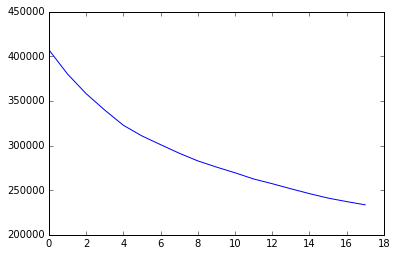

In [27]:
plt.plot(inertia_array[0:-1])

In [30]:
inertia_array2=np.zeros(6)
for i in tqdm.tqdm_notebook(range(20,26)):
    Km_run=KMeans(n_clusters=i)
    Km_run.fit_predict(Fingerprints)
    inertia_array2[i-20]=Km_run.inertia_


In [32]:
inertia_array=np.append(inertia_array,inertia_array2)

In [41]:
inertia_array=inertia_array[inertia_array>0]

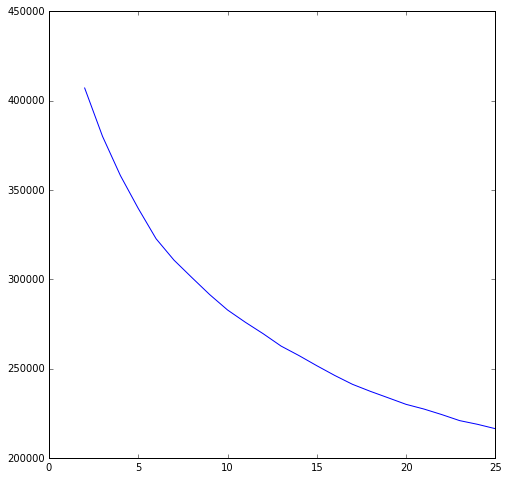

In [42]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(2,26),inertia_array)

In [10]:
from sklearn.decomposition import PCA
pc=PCA(n_components=50)

In [11]:
pca_fing=pc.fit_transform(Fingerprints)

In [16]:
list(enumerate(np.cumsum(pc.explained_variance_ratio_)))

[(0, 0.16149118125330231),
 (1, 0.27367676124440887),
 (2, 0.37250488053590131),
 (3, 0.44928486557661768),
 (4, 0.50712061537192721),
 (5, 0.54981904927756264),
 (6, 0.5853508611030771),
 (7, 0.6199933456382144),
 (8, 0.65102686933536513),
 (9, 0.68001285644235121),
 (10, 0.70764070985117467),
 (11, 0.73034622458312459),
 (12, 0.7499285382066283),
 (13, 0.76809153805162245),
 (14, 0.78435923367535199),
 (15, 0.79901524025260173),
 (16, 0.81279379573299504),
 (17, 0.82483369075007018),
 (18, 0.83574923304734461),
 (19, 0.84572638458306681),
 (20, 0.8541211132340204),
 (21, 0.86218460989479784),
 (22, 0.86988930772944628),
 (23, 0.87697220787494989),
 (24, 0.88343686872852345),
 (25, 0.88968751572190052),
 (26, 0.89574043598524988),
 (27, 0.90158254950196837),
 (28, 0.90718878573617356),
 (29, 0.91206621481073447),
 (30, 0.91678640751493468),
 (31, 0.92125512084878669),
 (32, 0.92520925187091885),
 (33, 0.92894818633254295),
 (34, 0.93261969138669665),
 (35, 0.93603947790603437),
 (36, 

In [15]:
Km_pca50=KMeans(n_clusters=15)

In [16]:
clusts=Km_pca50.fit_predict(pca_fing)

In [20]:
c_arr=[tuple(np.random.random(3)) for i in range(15)]


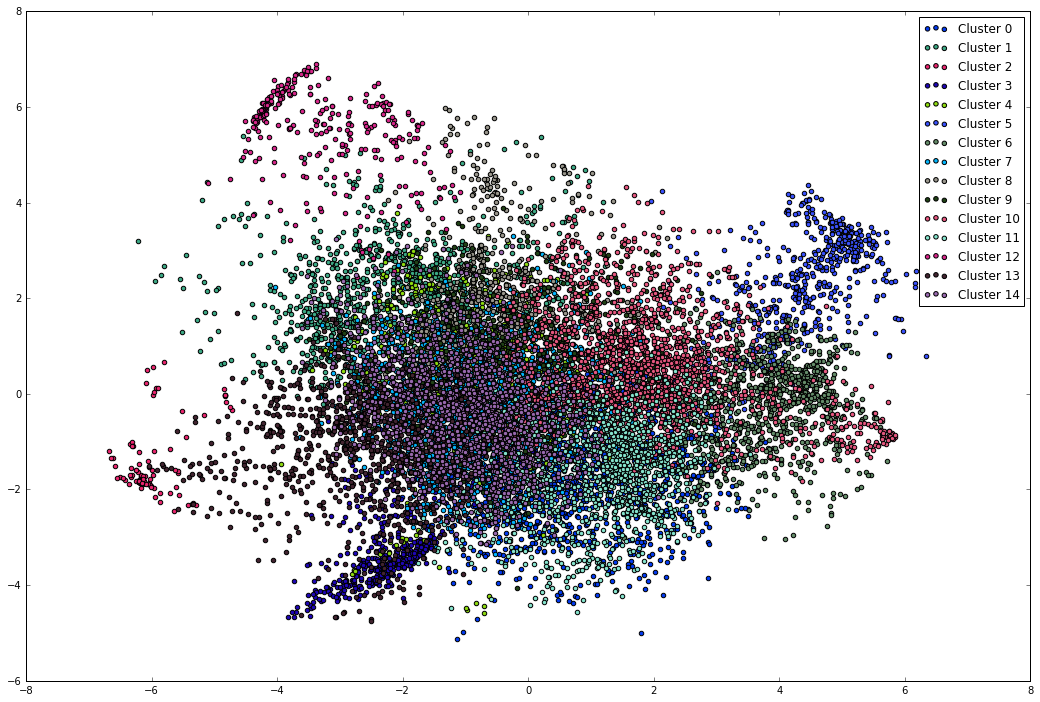

In [22]:
plt.figure(figsize=(18,12))
for i in range(15):
    plt.scatter(pca_fing[clusts==i,0],pca_fing[clusts==i,1],c=c_arr[i],label="Cluster "+str(i))
plt.legend()

In [23]:
Counter(clusts)

Counter({0: 1449,
         1: 1307,
         2: 97,
         3: 534,
         4: 695,
         5: 600,
         6: 1030,
         7: 1757,
         8: 648,
         9: 675,
         10: 1709,
         11: 1282,
         12: 284,
         13: 1061,
         14: 1594})

In [24]:
Df["cluster_pca50"]=clusts

In [28]:
Df.ix[0]["cluster_pca50"]

3

In [30]:
perov_clust_forms=Df[Df["cluster_pca50"]==Df.ix[0]["cluster_pca50"]]["Formula"]

In [31]:
perov_clust_forms

0          Nb1 Ag1 O3
32          Ag1 B1 O3
33         Zn1 Ag1 F3
86        Cs2 Ag2 Cl6
108       Tl1 Ag1 Cl3
132        Ni1 Ag1 F3
173        Rb1 Ag1 O3
191       Nb8 Ag8 O24
208        Mg1 Ag1 F3
230       Tl2 Ag2 Cl6
231        K2 Ag2 Cl6
240       Tl1 Ag1 Br3
241       Rb1 Ag1 Br3
246        Ta2 Ag2 O6
256        Cu2 Ag2 F6
257        Mg2 Ag2 F6
262        Cu1 Ag1 F3
269        Rb2 Ag2 F6
272        Cs2 Ag2 F6
308        K4 Ag4 F12
332       Cs1 Ag1 Br3
342       Rb1 Ag1 Cl3
343        K1 Ag1 Cl3
407        Al1 Ag1 O3
413         Y1 Ag1 O3
429        Tl1 Ag1 F3
445        K1 Ag1 Br3
485        Sr1 Ag1 O3
487        Sm2 Ag2 O5
504        La1 Al1 O3
             ...     
13950     Cs1 Tm1 Cl3
13967     Rb2 In2 Cl6
13968     Tl1 In1 Cl3
14003    Rb6 Mg6 Cl18
14030     Tl1 Cu1 Cl3
14041    Cs9 Hg9 Cl27
14053     Rb1 Sn1 Cl3
14067     Li1 Ti1 Cl3
14103      K1 Ge1 Cl3
14113     Li1 Sn1 Cl3
14134     Rb1 Pb1 Cl3
14195      K1 Cr1 Cl3
14196      K2 Cr2 Cl6
14197     Cs1 Sm1 Cl3
14211     

In [34]:
dist_centers=euclidean_distances(Km_pca50.cluster_centers_)

[  0.           5.12120207  11.25103217   6.20898426   4.31097553
   6.72687203   4.47506111   3.41287615   6.11102868   4.96744149
   3.44987532   3.43515359   9.39971675   3.78793609   3.80804623]


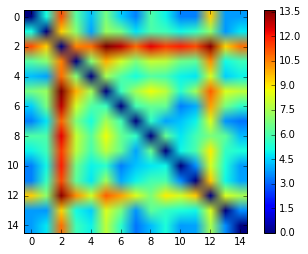

In [37]:
print dist_centers[0]
plt.imshow(dist_centers)
plt.colorbar()

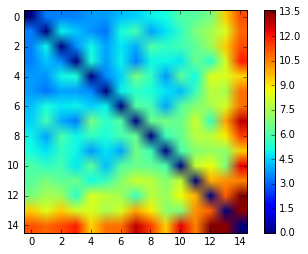

In [53]:
clust_centers=Km_pca50.cluster_centers_
sort_args=[np.argwhere(dist_centers[0]==i )[0][0] for i in np.sort(dist_centers[0])]
centers_sorted=clust_centers[[np.argwhere(dist_centers[0]==i )[0][0] for i in np.sort(dist_centers[0])]]
plt.imshow(euclidean_distances(centers_sorted))
plt.colorbar()

In [54]:
sort_args

[0, 7, 11, 10, 13, 14, 4, 6, 9, 1, 8, 3, 5, 12, 2]

In [58]:
clusts_sorted=np.zeros(len(clusts),dtype=int)
for i in range(15):
    clusts_sorted[clusts==i]=sort_args.index(i)
    
    

In [60]:

Df["cluster_pca50"]=clusts_sorted
Df_sorted=Df.sort_values(by="cluster_pca50")
clust_sort=Df_sorted["cluster_pca50"].values
fing_sort=Df_sorted.drop(["cluster_pca50","Formula"],axis=1).values

In [62]:
Counter(clust_sort)

Counter({0: 1449,
         1: 1757,
         2: 1282,
         3: 1709,
         4: 1061,
         5: 1594,
         6: 695,
         7: 1030,
         8: 675,
         9: 1307,
         10: 648,
         11: 534,
         12: 600,
         13: 284,
         14: 97})

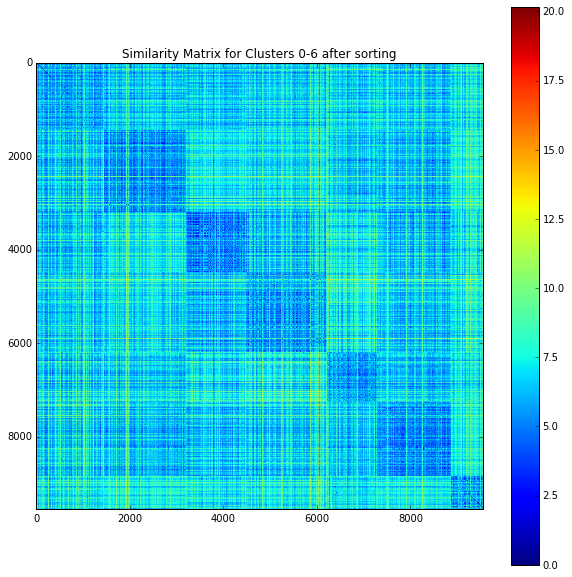

In [72]:
fing_06=fing_sort[clust_sort<7]

dist_06=euclidean_distances(fing_06)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 0-6 after sorting")
plt.imshow(dist_06)
plt.colorbar()



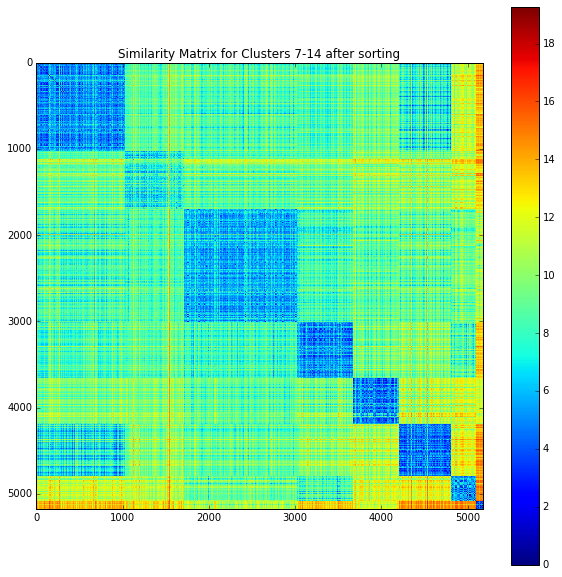

In [71]:
fing_714=fing_sort[clust_sort>6]

dist_714=euclidean_distances(fing_714)

plt.figure(figsize=(10,10))
plt.imshow(dist_714)
plt.title("Similarity Matrix for Clusters 7-14 after sorting")
plt.colorbar()

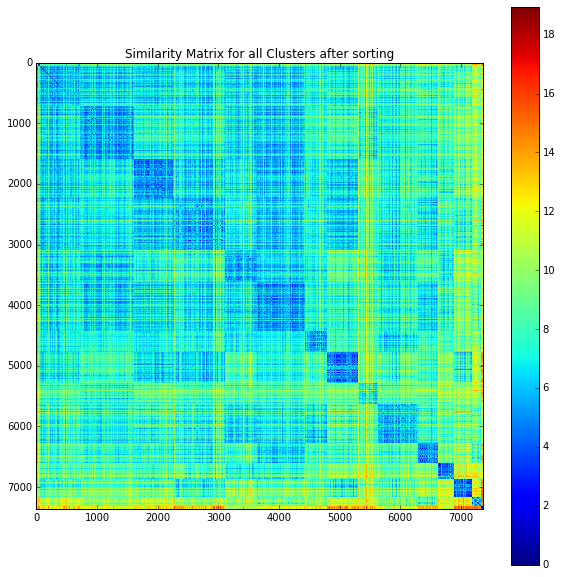

In [70]:
dist_014=euclidean_distances(fing_sort)
plt.figure(figsize=(10,10))
plt.imshow(dist_014[::2,::2])
plt.title("Similarity Matrix for all Clusters after sorting")
plt.colorbar()

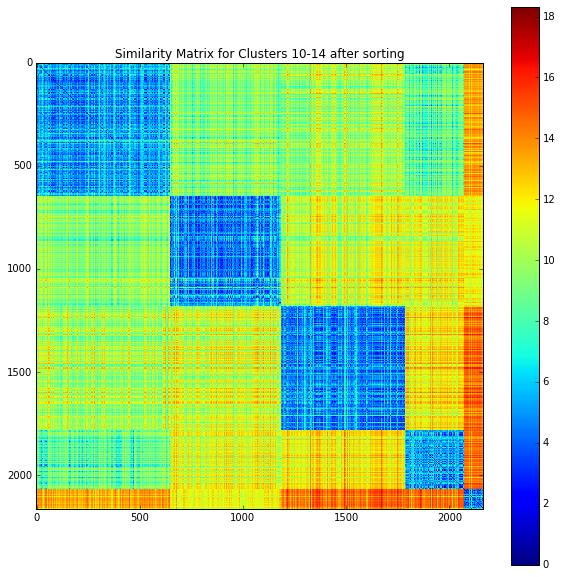

In [69]:
fing_914=fing_sort[clust_sort>9]

dist_914=euclidean_distances(fing_914)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 10-14 after sorting")
plt.imshow(dist_914)
plt.colorbar()

In [66]:
Df_sorted[Df_sorted["cluster_pca50"]==14]["Formula"]

7514      In1 P2 Pb1
275      Li2 Ag1 Bi1
1825      Tl1 B1 Cl2
1813      Tl1 B1 Te2
490      Ba2 Ag2 Bi2
1818      Hf1 Ge1 B2
1817       K1 Hg2 B1
1814      Zn1 B1 Se2
13368    Li2 Cd1 Ge1
12331     Sc2 Mn1 C1
1812      Sn2 B1 Se1
8451     Yb1 Li2 Si1
4367     Li2 Cu1 Sb1
1810      B1 Se2 Cl1
1822      Hg2 B1 Cl1
7097      Si1 Hg1 P2
1898      B1 Pd2 Br1
1826      Li1 B1 Br2
13130    Li2 Ca1 Si1
464       Ag2 B1 Br1
798       Al1 B2 Pb1
12639    Li2 Ca1 Ge1
1899       Y2 Fe1 B1
11565    Na1 Tl2 Bi1
1369     Tl1 Co1 As2
2678     Be1 In1 Si2
8140     Na1 Li2 Sb1
14367    Mn2 Co2 Ge2
14361    Cr2 Co2 Ge2
11633    Nb1 Bi2 Mo1
            ...     
7733      K1 Na2 Sb1
6518     Li2 Zn1 Ge1
14613    Ti1 Co2 Si1
6724     Li2 Mg1 Ge1
6731     Mg1 Ge1 Rh2
6733     Yb1 Li2 Ge1
6754     Ta1 Mn2 Ge1
1437      B1 Te2 As1
2901      V1 Co2 Ge1
6723      Mn2 V1 Ge1
6517     Mn1 Ni2 Ge1
6495     Mn2 Ni2 Ge2
7748      K2 Rb1 Sb1
11759     K1 Na2 Bi1
11762    Na2 Tl1 Bi1
14544    Co1 Re1 Ge2
14545    Ti1 

In [81]:
sort_args_new=[0, 7,14, 10,13,4,11, 6, 9, 1, 8, 3, 5, 12, 2]

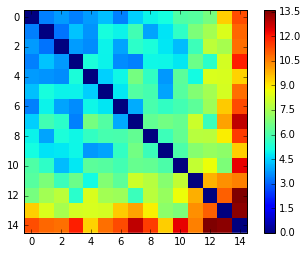

In [82]:
clust_centers=Km_pca50.cluster_centers_
centers_sorted_new=clust_centers[sort_args_new]
plt.imshow(euclidean_distances(centers_sorted_new),interpolation="none")
plt.colorbar()

# Redoing ordering by Hand

In [83]:
clusts_sorted=np.zeros(len(clusts),dtype=int)
for i in range(15):
    clusts_sorted[clusts==i]=sort_args_new.index(i)

In [84]:
Df["cluster_pca50"]=clusts_sorted
Df_sorted=Df.sort_values(by="cluster_pca50")
clust_sort=Df_sorted["cluster_pca50"].values
fing_sort=Df_sorted.drop(["cluster_pca50","Formula"],axis=1).values

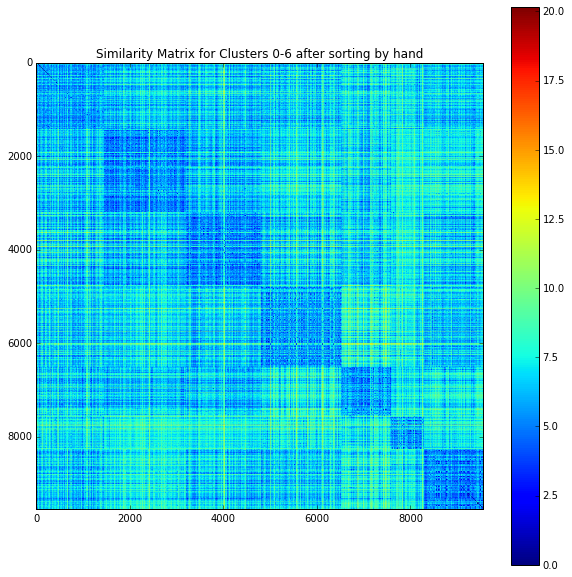

In [85]:
fing_06=fing_sort[clust_sort<7]

dist_06=euclidean_distances(fing_06)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 0-6 after sorting by hand")
plt.imshow(dist_06)
plt.colorbar()


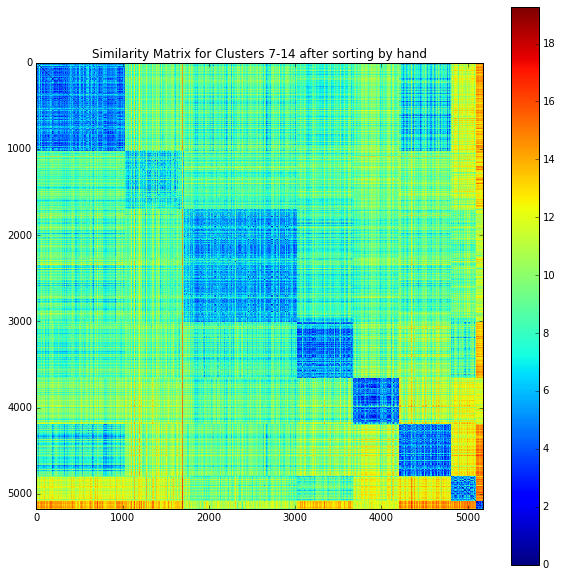

In [86]:
fing_714=fing_sort[clust_sort>6]

dist_714=euclidean_distances(fing_714)

plt.figure(figsize=(10,10))
plt.imshow(dist_714)
plt.title("Similarity Matrix for Clusters 7-14 after sorting by hand")
plt.colorbar()

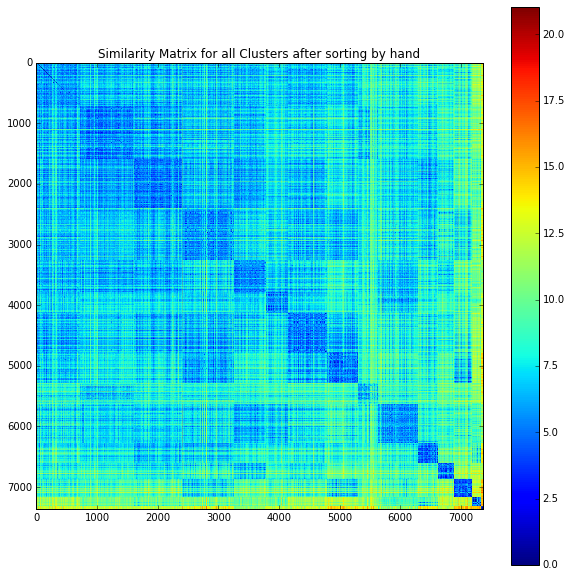

In [87]:
dist_014=euclidean_distances(fing_sort)
plt.figure(figsize=(10,10))
plt.imshow(dist_014[::2,::2])
plt.title("Similarity Matrix for all Clusters after sorting by hand")
plt.colorbar()

# Lets match results with Agglomerative clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering


In [3]:
Ag=AgglomerativeClustering(n_clusters=15)


In [91]:
pc2=PCA(n_components=50)
pca_fing_sort=pc2.fit_transform(fing_sort)

In [1]:
clust_ag=Ag.fit_predict(pca_fing_sort)

NameError: name 'Ag' is not defined